- **1.** Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?

In [126]:
p=52
t=53
beta = 2.0
spacing=beta**(p+1-t)
x=2.0**52     
y=x+spacing
z= x+0.5  #Somma ad x (numero pari),  un numero inferiore allo spacing in 2**52,  z risulta uguale ad x
q=y+0.5  #Somma ad y (numero pari),  un numero inferiore allo spacing in 2**52, per il rounding to even z risulta uguale ad y+1

- **2.** Valutare in aritmetica floating point l'espressione
$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$
B(x)=\frac{1}{x (x+1)}.
$ Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

x= [1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10 1.e+11 1.e+12 1.e+13 1.e+14 1.e+15 1.e+16 1.e+17 1.e+18 1.e+19
 1.e+20]
spacing  [2.22044605e-16 1.77635684e-15 1.42108547e-14 1.13686838e-13
 1.81898940e-12 1.45519152e-11 1.16415322e-10 1.86264515e-09
 1.49011612e-08 1.19209290e-07 1.90734863e-06 1.52587891e-05
 1.22070312e-04 1.95312500e-03 1.56250000e-02 1.25000000e-01
 2.00000000e+00 1.60000000e+01 1.28000000e+02 2.04800000e+03
 1.63840000e+04]
Errore relativo  [0.00000000e+00 3.81639165e-16 8.21283146e-16 2.16209395e-14
 6.38647291e-14 6.25044601e-13 1.07548935e-10 9.28145750e-10
 1.03187712e-08 1.50211282e-07 6.14600376e-07 3.17244773e-08
 4.84358805e-05 9.06716545e-04 6.03525942e-03 1.39238685e-02
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00]


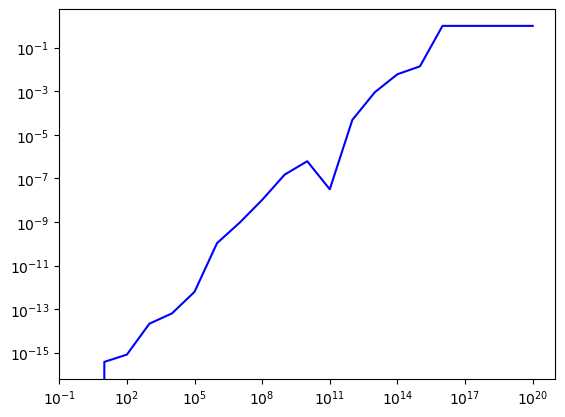

In [127]:
import numpy as np
import matplotlib.pyplot as plt

x = 10.0**np.arange(21)

Ax=1/x -1/(x+1)
Bx=1/(x*(x+1))
err_rel = np.abs(Ax-Bx)/np.abs(Bx)
print("x=",x)
print("spacing ",np.spacing(x))
print("Errore relativo ",err_rel)
plt.loglog(x,err_rel,'b-')

- **3-**  Quali problemi si possono incontrare nel calcolo delle radici di $a x^2+b x+c$? Provare a risolvere l'equazione $x^2+10^k x+1=0$ con k in range(1,9). Che cosa si osserva?

In [128]:
a=1
c=1
i = np.arange(1,9)
k = 10.0**i
x1= (-k+np.sqrt(k**2-4))/2
x2= (-k-np.sqrt(k**2-4))/2
print(x1)
print(x2)
x1new=c/(a*x2)
knew= -10.0**(-i)
err_rel = np.abs(knew-x1)/np.abs(knew)
print(err_rel)
errnew=np.abs(knew-x1new)/np.abs(knew)
print(errnew)

[-1.01020514e-01 -1.00010002e-02 -1.00000100e-03 -1.00000001e-04
 -1.00000034e-05 -1.00000761e-06 -9.96515155e-08 -7.45058060e-09]
[-9.89897949e+00 -9.99899990e+01 -9.99999000e+02 -9.99999990e+03
 -1.00000000e+05 -1.00000000e+06 -1.00000000e+07 -1.00000000e+08]
[1.02051443e-02 1.00020005e-04 1.00002262e-06 1.11176633e-08
 3.38535756e-07 7.61449337e-06 3.48484516e-03 2.54941940e-01]
[1.02051443e-02 1.00020005e-04 1.00000200e-06 1.00000002e-08
 1.00000202e-10 1.00013415e-12 1.00585162e-14 0.00000000e+00]


- **4.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. Visualizzare: un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.

Spacing in [1,2]  2.220446049250313e-16
Valori di 1/n  [1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09
 1.e-10 1.e-11 1.e-12 1.e-13 1.e-14 1.e-15 1.e-16]


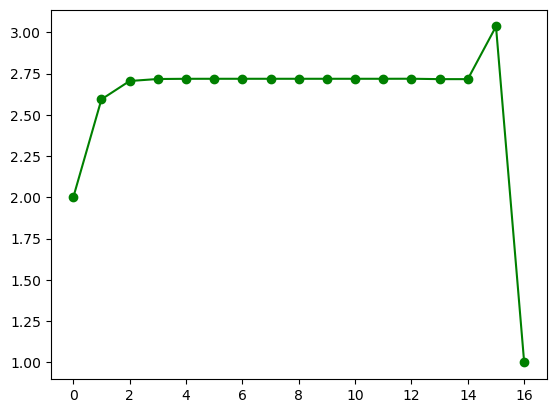

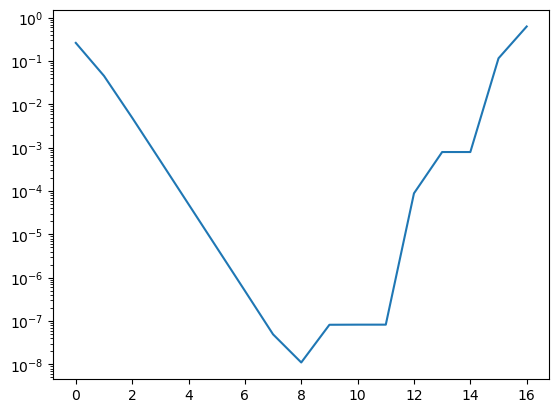

In [129]:
import math
import matplotlib.pyplot as plt
k = np.arange(17)
n=10.0**k
fn = (1+1/n)**n
err_rel=np.abs(math.exp(1)-fn)/math.exp(1)
print("Spacing in [1,2] ",np.spacing(1))
#Lo spacing in [1,2] è 2.
print("Valori di 1/n ",1/n)
plt.plot(k,fn, 'go-')
plt.show()
plt.plot(k,err_rel)
plt.yscale('log')
plt.show()

- **5.**
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=1,..,10.
Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
condizionato per tutti i valori di q assegnati;

In [130]:
import sympy as sym
from sympy.utilities.lambdify import lambdify

p_num = 10.0**5
i = np.arange(1,11)
q_vet=10.0**(-i)
p = sym.symbols('p')
q = sym.symbols('q')
f=-p+sym.sqrt(p**2+q)
df=sym.diff(f,q,1)
fp=f.subs(p,10**5)
dfp=df.subs(p,10**5)
df_numerica= lambdify(q,dfp,np) 
f_numerica=lambdify(q,fp,np)
condizionamento=np.abs(df_numerica(q_vet)*q_vet/f_numerica(q_vet))
print(condizionamento)

[0.99999239 0.99999239 1.00174164 1.01058054 1.14532461 0.34359738
        inf        inf        inf        inf]


/tmp/ipykernel_34234/2544604462.py:15: RuntimeWarning: divide by zero encountered in divide
  condizionamento=np.abs(df_numerica(q_vet)*q_vet/f_numerica(q_vet))


- **6.**
Assegnato il sistema lineare $Ax = b$, con
$$
A =
\left [
\begin{array}{ccc}
6 & 63 & 662.2\\
63 & 662.2 & 6967.8\\
662.2 & 6967.8 & 73393.5664
\end{array}
\right ], \qquad
b =
\left [
\begin{array}{c}
1.1\\
2.33\\
1.7
\end{array}
\right ]
$$
- trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
- perturbare la matrice dei coefficienti della quantità
$$
\delta A =
0.01 \, \ast \,
\left [ \begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}
\right ]
$$
quindi calcolare l'errore relativo sulla soluzione e confrontarlo con la
perturbazione relativa sui dati di ingresso. Cosa si osserva?

In [131]:
import numpy.linalg as npl
import scipy.linalg as spl
A=np.array([[6, 63, 662.2],[63, 662.2, 6967.8],[662.2, 6967.8, 73393.5664]])
b=np.array([1.1, 2.33, 1.7])
KA= npl.cond(A,np.inf)

print("Indice di condizionamento di A {:e}".format(KA))
x=spl.solve(A,b)
A1=A.copy()
A1[0,0]=A1[0,0]+0.01

x_per=spl.solve(A1,b)
#Errore relativo sui dati
err_dati=npl.norm(A-A1,np.inf)/npl.norm(A,np.inf)

print("Errore relativo sui dati ", err_dati)
print("Errore relativo sui dati  in percentuale ", err_dati*100,"%")

err_rel_sol=npl.norm(x_per-x,np.inf)/npl.norm(x,np.inf)
print("Errore relativo sulla soluzione ", err_rel_sol)
print("Errore relativo sulla soluzione  in percentuale ", err_rel_sol*100,"%")

Indice di condizionamento di A 1.975302e+10
Errore relativo sui dati  1.2342088165597937e-07
Errore relativo sui dati  in percentuale  1.2342088165597937e-05 %
Errore relativo sulla soluzione  0.99950815479354
Errore relativo sulla soluzione  in percentuale  99.950815479354 %


- **7.**
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$.

In [132]:
def exp_som(x, it) :
    ris = 0
    for i in range(0,it) :
        ris += x**i/math.factorial(i)
    return ris

def exp_stable(x,it) :
    if (x <0) :
        ris = 0
        x = abs(x)
        for i in range(0,it) :
            ris += (x**i/math.factorial(i))
        return 1/ris
    else :
        return exp_som(x,it)

[7.24397100e-09 2.07805404e-09 6.75669312e-11 5.28420997e-12
 2.56149994e-12 9.76467979e-14 4.91154219e-15 7.85706980e-16
 2.74948532e-16 0.00000000e+00 2.69353721e-16 0.00000000e+00
 0.00000000e+00 1.84678077e-16 0.00000000e+00 0.00000000e+00
 1.26621574e-16 1.77238675e-16 2.48090012e-16 3.47264242e-16
 1.21520867e-16]


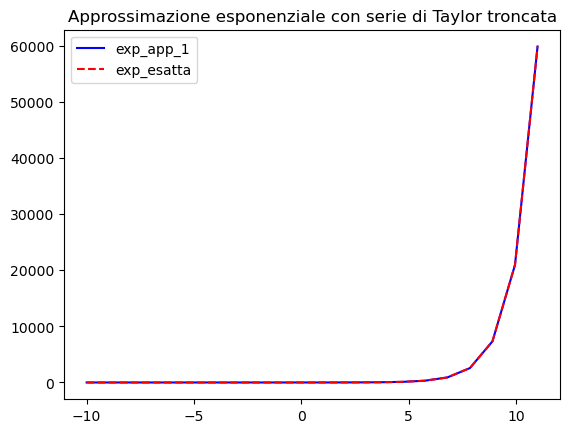

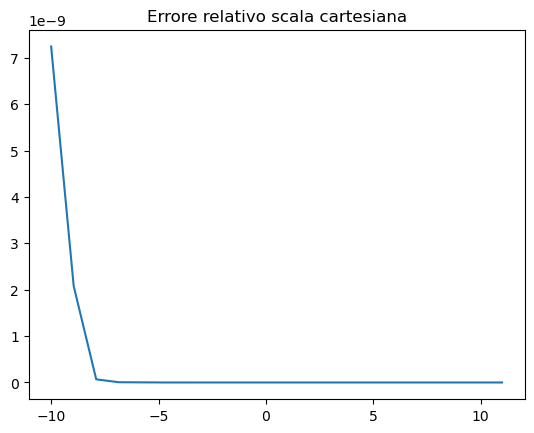

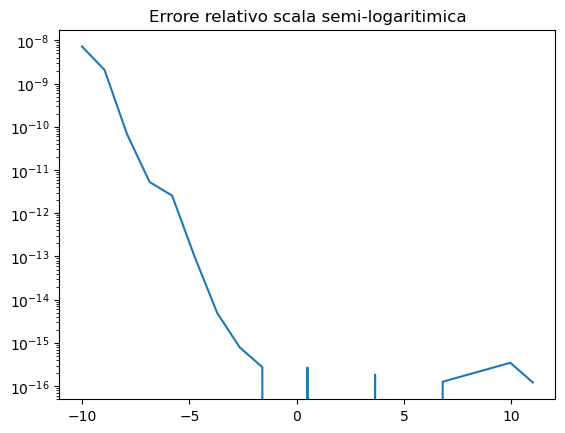

[1.49257138e-16 4.17845655e-16 0.00000000e+00 6.14014638e-16
 1.43244600e-16 0.00000000e+00 2.80659554e-16 1.96426745e-16
 0.00000000e+00 1.92429741e-16 2.69353721e-16 0.00000000e+00
 0.00000000e+00 1.84678077e-16 0.00000000e+00 0.00000000e+00
 1.26621574e-16 1.77238675e-16 2.48090012e-16 3.47264242e-16
 1.21520867e-16]


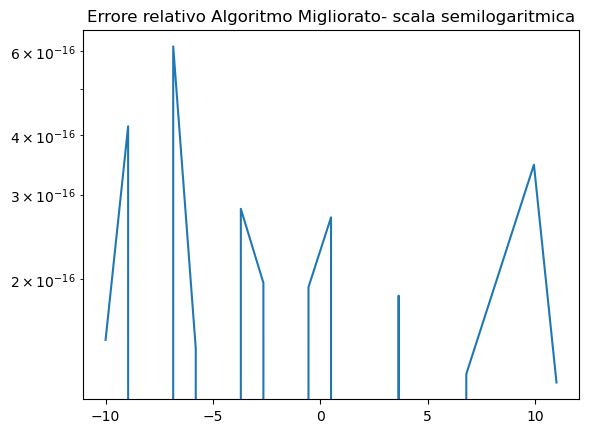

In [133]:
x = np.linspace(-10,11,21)
exp_app=np.zeros((21,))
exp_es=np.exp(x)
for i in range(21):
    exp_app[i]= exp_som(x[i],100)

err_rel = np.abs(exp_app-exp_es)/np.abs(exp_es)
print(err_rel)
plt.plot(x,exp_app,'b-',x,exp_es,'r--')
plt.title('Approssimazione esponenziale con serie di Taylor troncata')
plt.legend(['exp_app_1','exp_esatta'])
plt.show()



plt.plot(x,err_rel)
plt.title("Errore relativo scala cartesiana")
plt.show()


plt.plot(x,err_rel)
plt.yscale("log")
plt.title("Errore relativo scala semi-logaritimica")
plt.show()

for i in range(21) :
       exp_app[i]= exp_stable(x[i],100)
   

err_rel_2=np.abs(exp_app-exp_es)/np.abs(exp_es)
print(err_rel_2)
plt.plot(x,err_rel_2)
plt.yscale("log")
plt.title('Errore relativo Algoritmo Migliorato- scala semilogaritmica')
plt.show()


- **8.**
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).

In [135]:
x2=np.array([0.0004,0.2507,0.5008,2.0007, 8.0013])
y2=np.array([0.0007,0.0162,0.0288, 0.0309,0.0310])
n=1 #retta di regressione: grado 1
n1=n+1  # gradi di libertà
A2=np.vander(x2,increasing=True)[:,:n1]
condA2=np.linalg.cond(A2)
print("condizionamento di A2 ",condA2)
alpha2=eqnorm(A2,y2)
xv=np.linspace(np.min(x2),np.max(x2),100)
pol2=np.polyval(np.flip(alpha2),xv)
plt.plot(xv,pol2,x2,y2,'ro')
plt.show()
errore=np.linalg.norm(y2-np.polyval(np.flip(alpha2),x2))**2
print("errore ",errore)

condizionamento di A2  4.663457775986456


NameError: name 'eqnorm' is not defined